In [2]:
%pip install -r requirements.txt

  Using cached polars-1.38.1-py3-none-any.whl.metadata (10 kB)
  Using cached great_expectations-1.11.3-py3-none-any.whl.metadata (9.3 kB)
  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached pmdarima-2.1.1-cp312-cp312-win_amd64.whl.metadata (8.5 kB)
  Using cached mlflow-3.9.0-py3-none-any.whl.metadata (31 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached fastapi-0.128.6-py3-none-any.whl.metadata (30 kB)
  Using cached uvicorn-0.40.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached pytest-9.0.2-py3-none-any.whl.metadata (7.6 kB)
  Using cached pytest_cov-7.0.0-py3-none-any.whl.metadata (31 kB)
  Using cached loguru-0.7.3-py3-none-any.whl.metadata (22 kB)
  Using cached polars_runtime_32-1.38.1-cp310-abi3-win_amd64.whl.metadata (1.5 kB)
  Using cached altair-4.2.2-py3-none-any.whl.metadata

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'd:\\anaconda\\lib\\site-packages\\scipy\\stats\\_page_trend_test.py'
Consider using the `--user` option or check the permissions.



  Using cached polars-1.38.1-py3-none-any.whl.metadata (10 kB)
  Using cached great_expectations-1.11.3-py3-none-any.whl.metadata (9.3 kB)
  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached pmdarima-2.1.1-cp312-cp312-win_amd64.whl.metadata (8.5 kB)
  Using cached mlflow-3.9.0-py3-none-any.whl.metadata (31 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached uvicorn-0.40.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached pytest-9.0.2-py3-none-any.whl.metadata (7.6 kB)
  Using cached pytest_cov-7.0.0-py3-none-any.whl.metadata (31 kB)
  Using cached loguru-0.7.3-py3-none-any.whl.metadata (22 kB)
  Using cached polars_runtime_32-1.38.1-cp310-abi3-win_amd64.whl.metadata (1.5 kB)
  Using cached altair-4.2.2-py3-none-any.whl.metadata (13 kB)
  Using cached marshmallow-3.26.2-py3-none-any.whl.metad

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'd:\\anaconda\\Lib\\site-packages\\scipy-1.17.0.dist-info\\INSTALLERt1brs_u5.tmp'



In [22]:
import pandas as pd
import numpy as np
from src.ingestion.loader import CommodityLoader
from src.preprocessing.cleaner import DataCleaner
from src.features.generator import FeatureGenerator

# Load danh sách commodities
loader = CommodityLoader()
commodities = loader.list_commodities()

print("=" * 60)
print("DANH SÁCH COMMODITIES VÀ TRẠNG THÁI DỮ LIỆU")
print("=" * 60)

# Kiểm tra từng commodity
results = []
for commodity in commodities:
    commodity_id = commodity['id']
    try:
        df = loader.load_commodity(commodity_id)
        
        # Kiểm tra dữ liệu sau khi clean
        cleaner = DataCleaner()
        df_clean = cleaner.clean(df)
        
        status = "✅ OK" if len(df_clean) >= 100 else "⚠️ Ít dữ liệu"
        if len(df_clean) < 50:
            status = "❌ Quá ít"
        
        results.append({
            'Commodity': commodity_id,
            'Tên': commodity['name'],
            'Số dòng gốc': len(df),
            'Sau clean': len(df_clean),
            'Trạng thái': status
        })
        
    except Exception as e:
        results.append({
            'Commodity': commodity_id,
            'Tên': commodity['name'],
            'Số dòng gốc': 0,
            'Sau clean': 0,
            'Trạng thái': f"❌ Lỗi: {str(e)[:30]}"
        })

# Hiển thị kết quả
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))
print("\n" + "=" * 60)

2026-02-10 10:38:22.067 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 261 records for crude_oil
2026-02-10 10:38:22.096 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2556 records for coffee
2026-02-10 10:38:22.158 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2542 records for corn
2026-02-10 10:38:22.193 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2598 records for cotton
2026-02-10 10:38:22.255 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2544 records for gas


DANH SÁCH COMMODITIES VÀ TRẠNG THÁI DỮ LIỆU


2026-02-10 10:38:22.305 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2555 records for milk
2026-02-10 10:38:22.361 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2616 records for oil
2026-02-10 10:38:22.417 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 3015 records for pork
2026-02-10 10:38:22.469 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 352 records for pvc
2026-02-10 10:38:22.493 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 1489 records for rubber
2026-02-10 10:38:22.538 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2541 records for rice
2026-02-10 10:38:22.598 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 1533 records for steel
2026-02-10 10:38:22.641 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2599 records for sugar
2026-02-10 10:38:22.708 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 1440 records for urea


Commodity             Tên  Số dòng gốc  Sau clean Trạng thái
crude_oil Crude Oil (WTI)          261        261       ✅ OK
   coffee  Coffee Arabica         2556       2632       ✅ OK
     corn            Corn         2542       2632       ✅ OK
   cotton          Cotton         2598       2632       ✅ OK
      gas             Gas         2544       2632       ✅ OK
     milk            Milk         2555       2632       ✅ OK
      oil             Oil         2616       2632       ✅ OK
     pork            Pork         3015       2608       ✅ OK
      pvc             Pvc          352        301       ✅ OK
   rubber          Rubber         1489       1590       ✅ OK
     rice            Rice         2541       2632       ✅ OK
    steel           Steel         1533       1592       ✅ OK
    sugar           Sugar         2599       2632       ✅ OK
     urea            Urea         1440       1591       ✅ OK



In [26]:
from src.training.trainer import Trainer

# Chọn commodity để train (thay đổi tên này)
commodity_to_train = "coffee"  # Hoặc: cotton, gas, milk, oil, etc.

print(f"\n🚀 Bắt đầu training cho: {commodity_to_train}")
print("=" * 60)

try:
    # Khởi tạo trainer
    trainer = Trainer(use_mlflow=False)  # Tắt MLflow để train nhanh hơn
    
    # Train commodity với model_type
    result = trainer.train_commodity(
        commodity_id=commodity_to_train,
        model_type="ml",  # Chọn: "baseline", "ml", hoặc "all"
        backtest=True,
        save_model=True
    )
    
    print("\n✅ Training hoàn thành!")
    
    # Hiển thị kết quả
    if "models" in result and "ml" in result["models"]:
        ml_results = result["models"]["ml"]
        if "best_model" in ml_results:
            best = ml_results["best_model"]
            print(f"Best model: {best['name']}")
            print(f"Best MAE: {best.get('mae', 'N/A'):.4f}")
        
        # Hiển thị metrics của từng model
        for model_name in ["xgboost", "lightgbm"]:
            if model_name in ml_results and "error" not in ml_results[model_name]:
                metrics = ml_results[model_name]
                print(f"\n{model_name.upper()} Metrics:")
                print(f"  MAE: {metrics.get('mae', 'N/A'):.4f}")
                print(f"  RMSE: {metrics.get('rmse', 'N/A'):.4f}")
                print(f"  MAPE: {metrics.get('mape', 'N/A'):.4f}%")
    
except Exception as e:
    print(f"\n❌ Lỗi khi training {commodity_to_train}:")
    print(f"   {str(e)}")
    import traceback
    traceback.print_exc()

2026-02-10 10:40:59.316 | INFO     | src.training.trainer:prepare_data:127 - Loading data for coffee
2026-02-10 10:40:59.322 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2556 records for coffee


2026-02-10 10:40:59.359 | INFO     | src.training.trainer:prepare_data:136 - Cleaning data
2026-02-10 10:40:59.394 | INFO     | src.training.trainer:prepare_data:143 - Generating features
2026-02-10 10:40:59.423 | WARNING  | src.features.generator:_add_volatility_features:169 - Not enough data for volatility features: 0 rows



🚀 Bắt đầu training cho: coffee

❌ Lỗi khi training coffee:
   attempt to get argmax of an empty sequence


Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23456\3066602150.py", line 14, in <module>
    result = trainer.train_commodity(
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Work\Comodity-Price-Forecasting\src\training\trainer.py", line 172, in train_commodity
    df = self.prepare_data(commodity_id)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Work\Comodity-Price-Forecasting\src\training\trainer.py", line 144, in prepare_data
    df = self.feature_generator.generate(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Work\Comodity-Price-Forecasting\src\features\generator.py", line 73, in generate
    featured = self._generate_features(commodity_df)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Work\Comodity-Price-Forecasting\src\features\generator.py", line 102, in _generate_features
    df = self._add_return_features(df, target)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Work\Comodity-Price-For

In [7]:
!python -m src.training.trainer --commodity crude_oil --model-type ml

2026-02-10 10:12:50.055 | WARNING  | __main__:_setup_mlflow:106 - MLflow not installed, tracking disabled
2026-02-10 10:12:50.055 | INFO     | __main__:prepare_data:127 - Loading data for crude_oil
2026-02-10 10:12:50.061 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 261 records for crude_oil
2026-02-10 10:12:50.066 | INFO     | __main__:prepare_data:136 - Cleaning data
2026-02-10 10:12:50.072 | INFO     | __main__:prepare_data:143 - Generating features
2026-02-10 10:12:56.254 | INFO     | src.models.ml:fit:150 - XGBoost fitted with 48 features
2026-02-10 10:12:59.939 | INFO     | src.models.ml:fit:264 - LightGBM fitted with 48 features
d:\anaconda\Lib\site-packages\xgboost\sklearn.py:1118: UserWarning: [10:12:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
2026-02-10 10:12:59.955 | IN

In [6]:
%pip install xgboost lightgbm

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
!python -m src.inference.predictor --commodity crude_oil --horizon 1 --horizon 7 --horizon 30

Predictions saved to: d:\Work\Comodity-Price-Forecasting\data\predictions\predictions_20260210_101444.parquet
commodity_id     prediction_date          as_of_date  horizon target_date  prediction  last_close  predicted_change_pct
   crude_oil 2026-02-10 10:14:44 2024-12-31 00:00:00        1  2025-01-01  139.105103      153.23             -9.218102
   crude_oil 2026-02-10 10:14:44 2024-12-31 00:00:00        7  2025-01-07  139.105103      153.23             -9.218102
   crude_oil 2026-02-10 10:14:44 2024-12-31 00:00:00       30  2025-01-30  139.105103      153.23             -9.218102


d:\anaconda\Lib\site-packages\xgboost\sklearn.py:1127: UserWarning: [10:14:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1511: Unknown file format: `model`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)
2026-02-10 10:14:44.226 | INFO     | src.models.ml:load:170 - Model loaded from d:\Work\Comodity-Price-Forecasting\models\crude_oil\xgboost_best.model
2026-02-10 10:14:44.226 | INFO     | __main__:load_model:101 - Loaded xgboost model for crude_oil
2026-02-10 10:14:44.235 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 261 records for crude_oil
2026-02-10 10:14:44.606 | INFO     | __main__:save_predictions:240 - Predictions saved to d:\Work\Comodity-Price-Forecasting\data\predictions\predictions_20260210_101444.parquet


In [13]:
!python visualize_predictions.py

Loading predictions from: data\predictions\predictions_20260210_101444.parquet

Predictions loaded: 3 rows
Commodities: ['crude_oil']
Horizons: [1, 7, 30]

Visualizing: crude_oil

Generating prediction vs actual plot...
Figure saved to figures/crude_oil_predictions.png
Generating multi-horizon comparison...
Figure saved to figures/crude_oil_multi_horizon.png

✅ Visualizations saved to figures/ directory
   - crude_oil_predictions.png
   - crude_oil_multi_horizon.png
Figure(1400x600)
Figure(1400x800)


2026-02-10 10:19:26.272 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 261 records for crude_oil


In [1]:
import pandas as pd
import numpy as np
from src.ingestion.loader import CommodityLoader
from src.preprocessing.cleaner import DataCleaner
from src.features.generator import FeatureGenerator

# Load danh sách commodities
loader = CommodityLoader()
commodities = loader.list_commodities()

print("=" * 60)
print("DANH SÁCH COMMODITIES VÀ TRẠNG THÁI DỮ LIỆU")
print("=" * 60)

# Kiểm tra từng commodity
results = []
for commodity in commodities:
    commodity_id = commodity['id']
    try:
        df = loader.load_commodity(commodity_id)
        
        # Kiểm tra dữ liệu sau khi clean
        cleaner = DataCleaner()
        df_clean = cleaner.clean(df)
        
        status = "✅ OK" if len(df_clean) >= 100 else "⚠️ Ít dữ liệu"
        if len(df_clean) < 50:
            status = "❌ Quá ít"
        
        results.append({
            'Commodity': commodity_id,
            'Tên': commodity['name'],
            'Số dòng gốc': len(df),
            'Sau clean': len(df_clean),
            'Trạng thái': status
        })
        
    except Exception as e:
        results.append({
            'Commodity': commodity_id,
            'Tên': commodity['name'],
            'Số dòng gốc': 0,
            'Sau clean': 0,
            'Trạng thái': f"❌ Lỗi: {str(e)[:30]}"
        })

# Hiển thị kết quả
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))
print("\n" + "=" * 60)

2026-02-10 10:49:15.203 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 261 records for crude_oil
2026-02-10 10:49:15.215 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2556 records for coffee
2026-02-10 10:49:15.253 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2542 records for corn
2026-02-10 10:49:15.291 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2598 records for cotton
2026-02-10 10:49:15.325 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2544 records for gas
2026-02-10 10:49:15.362 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2555 records for milk
2026-02-10 10:49:15.398 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2616 records for oil


DANH SÁCH COMMODITIES VÀ TRẠNG THÁI DỮ LIỆU


2026-02-10 10:49:15.432 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 3015 records for pork
2026-02-10 10:49:15.462 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 352 records for pvc
2026-02-10 10:49:15.475 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 1489 records for rubber
2026-02-10 10:49:15.501 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2541 records for rice
2026-02-10 10:49:15.533 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 1533 records for steel
2026-02-10 10:49:15.561 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2599 records for sugar
2026-02-10 10:49:15.598 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 1440 records for urea


Commodity             Tên  Số dòng gốc  Sau clean Trạng thái
crude_oil Crude Oil (WTI)          261        261       ✅ OK
   coffee  Coffee Arabica         2556       2632       ✅ OK
     corn            Corn         2542       2632       ✅ OK
   cotton          Cotton         2598       2632       ✅ OK
      gas             Gas         2544       2632       ✅ OK
     milk            Milk         2555       2632       ✅ OK
      oil             Oil         2616       2632       ✅ OK
     pork            Pork         3015       2608       ✅ OK
      pvc             Pvc          352        301       ✅ OK
   rubber          Rubber         1489       1590       ✅ OK
     rice            Rice         2541       2632       ✅ OK
    steel           Steel         1533       1592       ✅ OK
    sugar           Sugar         2599       2632       ✅ OK
     urea            Urea         1440       1591       ✅ OK



In [3]:
from src.training.trainer import Trainer

commodity_to_train = "coffee"

print(f"\n🚀 Bắt đầu training cho: {commodity_to_train}")
print("=" * 60)

try:
    trainer = Trainer(use_mlflow=False)
    
    result = trainer.train_commodity(
        commodity_id=commodity_to_train,
        model_type="ml",
        backtest=True,
        save_model=True
    )
    
    print("\n✅ Training hoàn thành!")
    print(f"Data rows: {result.get('data_rows', 'N/A')}")
    print(f"Features: {result.get('n_features', 'N/A')}")
    
    if "models" in result and "ml" in result["models"]:
        ml_results = result["models"]["ml"]
        
        # Hiển thị best model
        if "best_model" in ml_results:
            best = ml_results["best_model"]
            print(f"\n🏆 Best model: {best['name']}")
            mae_value = best.get('mae', None)
            if mae_value is not None:
                print(f"   Best MAE: {mae_value:.4f}")
        
        # Hiển thị metrics của từng model
        for model_name in ["xgboost", "lightgbm"]:
            if model_name in ml_results and "error" not in ml_results[model_name]:
                metrics = ml_results[model_name]
                print(f"\n📊 {model_name.upper()} Metrics:")
                for metric_name in ["mae", "rmse", "mape", "mase"]:
                    value = metrics.get(metric_name)
                    if value is not None:
                        if metric_name == "mape":
                            print(f"   {metric_name.upper()}: {value:.2f}%")
                        else:
                            print(f"   {metric_name.upper()}: {value:.4f}")
    
except Exception as e:
    print(f"\n❌ Lỗi khi training {commodity_to_train}:")
    print(f"   {str(e)}")
    import traceback
    traceback.print_exc()

2026-02-10 10:50:33.356 | INFO     | src.training.trainer:prepare_data:127 - Loading data for coffee
2026-02-10 10:50:33.360 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2556 records for coffee
2026-02-10 10:50:33.396 | INFO     | src.training.trainer:prepare_data:136 - Cleaning data
2026-02-10 10:50:33.429 | INFO     | src.training.trainer:prepare_data:143 - Generating features



🚀 Bắt đầu training cho: coffee


d:\Work\Comodity-Price-Forecasting\src\features\generator.py:179: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df[target].pct_change()
d:\Work\Comodity-Price-Forecasting\src\features\generator.py:237: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["return_1d"] = df[target].pct_change(1)
d:\Work\Comodity-Price-Forecasting\src\features\generator.py:238: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA 


✅ Training hoàn thành!
Data rows: 2632
Features: 48

🏆 Best model: xgboost

📊 XGBOOST Metrics:
   MAE: 0.7166
   RMSE: 0.9430
   MAPE: 19.50%
   MASE: 31.9939

📊 LIGHTGBM Metrics:
   MAE: 0.7397
   RMSE: 0.9666
   MAPE: 20.18%
   MASE: 33.0242


In [4]:
from src.inference.predictor import BatchPredictor

print("\n🔮 Tạo predictions cho coffee")
print("=" * 60)

# Khởi tạo predictor
predictor = BatchPredictor()

# Tạo predictions cho coffee
predictions = predictor.predict_commodity(
    commodity_id="coffee",
    horizons=[1, 7, 30]
)

print(f"\n✅ Đã tạo {len(predictions)} predictions")
print("\nPredictions:")
print(predictions.to_string(index=False))

# Lưu predictions
output_path = predictor.save_predictions(predictions, format="parquet")
print(f"\n💾 Đã lưu predictions tại: {output_path}")

d:\anaconda\Lib\site-packages\xgboost\sklearn.py:1127: UserWarning: [10:52:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1511: Unknown file format: `model`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)
2026-02-10 10:52:18.184 | INFO     | src.models.ml:load:170 - Model loaded from d:\Work\Comodity-Price-Forecasting\models\coffee\xgboost_best.model
2026-02-10 10:52:18.184 | INFO     | src.inference.predictor:load_model:101 - Loaded xgboost model for coffee
2026-02-10 10:52:18.188 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2556 records for coffee
d:\Work\Comodity-Price-Forecasting\src\features\generator.py:179: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df[target].pct_change()
d:\Work\Comodity-Price-Forecastin


🔮 Tạo predictions cho coffee

✅ Đã tạo 3 predictions

Predictions:
commodity_id     prediction_date          as_of_date  horizon target_date  prediction  last_close  predicted_change_pct
      coffee 2026-02-10 10:52:18 2026-02-03 00:00:00        1  2026-02-04    2.403879        3.17            -24.167842
      coffee 2026-02-10 10:52:18 2026-02-03 00:00:00        7  2026-02-10    2.403879        3.17            -24.167842
      coffee 2026-02-10 10:52:18 2026-02-03 00:00:00       30  2026-03-05    2.403879        3.17            -24.167842

💾 Đã lưu predictions tại: d:\Work\Comodity-Price-Forecasting\data\predictions\predictions_20260210_105218.parquet


2026-02-10 10:52:28.653 | INFO     | src.ingestion.loader:load_commodity:80 - Loaded 2556 records for coffee



📊 Tạo visualization cho coffee

1. Tạo biểu đồ predictions vs actual...
Figure saved to figures/coffee_predictions.png


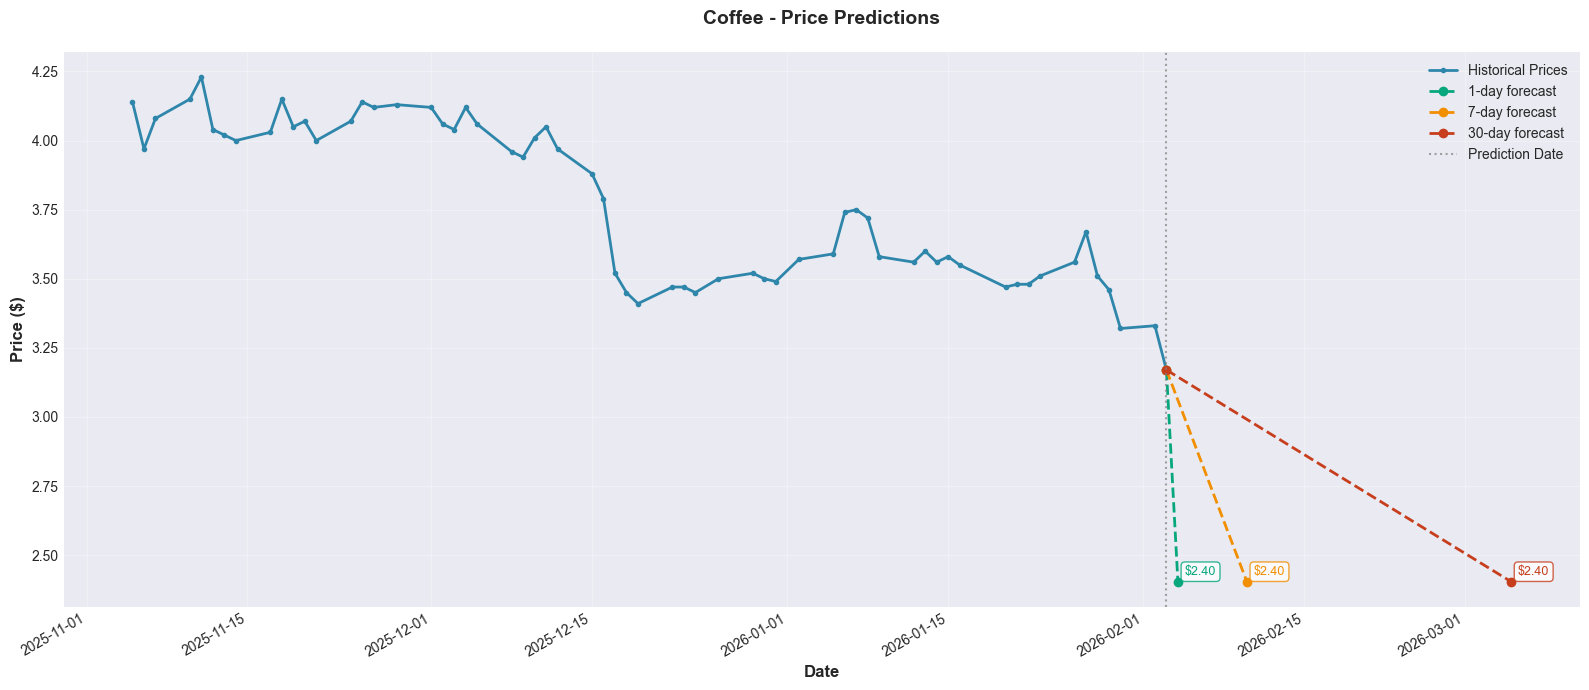

   ✅ Saved: figures/coffee_predictions.png

2. Tạo biểu đồ multi-horizon comparison...
Figure saved to figures/coffee_multi_horizon.png


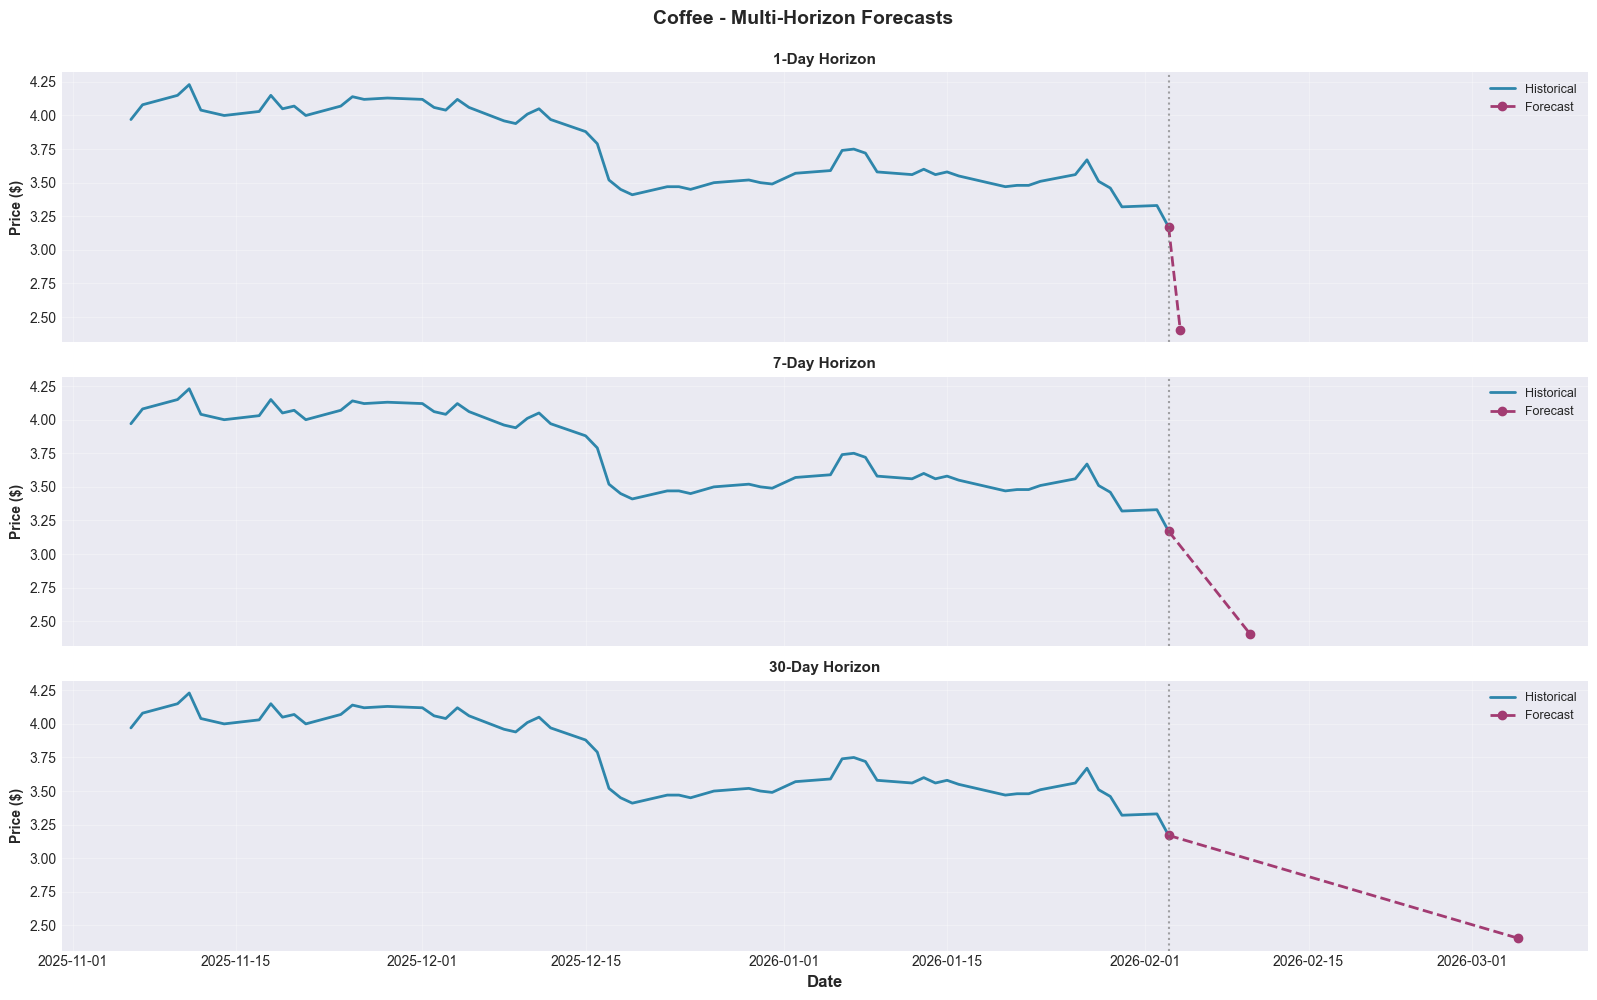

   ✅ Saved: figures/coffee_multi_horizon.png

✅ Visualization hoàn thành!
Các file đã được lưu trong thư mục 'figures/'


In [5]:
from src.visualization.plot_predictions import PredictionVisualizer
from src.ingestion.loader import CommodityLoader
import matplotlib.pyplot as plt
from pathlib import Path

print("\n📊 Tạo visualization cho coffee")
print("=" * 60)

# Load actual data
loader = CommodityLoader()
actual_data = loader.load_commodity("coffee")

# Tạo visualizer
viz = PredictionVisualizer()

# Tạo thư mục figures
output_dir = Path("figures")
output_dir.mkdir(exist_ok=True)

# Plot 1: Prediction vs Actual (90 ngày gần nhất)
print("\n1. Tạo biểu đồ predictions vs actual...")
fig1 = viz.plot_prediction_vs_actual(
    commodity_id="coffee",
    predictions_df=predictions,
    actual_df=actual_data,
    lookback_days=90,
    save_path="figures/coffee_predictions.png",
    figsize=(16, 7)
)
plt.show()
print("   ✅ Saved: figures/coffee_predictions.png")

# Plot 2: Multi-horizon comparison
print("\n2. Tạo biểu đồ multi-horizon comparison...")
fig2 = viz.plot_multi_horizon_comparison(
    commodity_id="coffee",
    predictions_df=predictions,
    actual_df=actual_data,
    save_path="figures/coffee_multi_horizon.png",
    figsize=(16, 10)
)
plt.show()
print("   ✅ Saved: figures/coffee_multi_horizon.png")

print("\n✅ Visualization hoàn thành!")
print("Các file đã được lưu trong thư mục 'figures/'")